In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
data = {"Name": ["no SIHFT",
                 "EDDI + CFCSS", "EDDI + RASM", "EDDI + inter-RASM", 
                 "FDSC + CFCSS", "FDSC + RASM", "FDSC + inter-RASM",
                 "sEDDI + CFCSS", "sEDDI + RASM", "sEDDI + inter-RASM"],
        "SDC": [2.79,
                0.23, 0.33, 0.09,
                0.85, 1.40, 0.66,
                0.47, 0.26, 0.18],
        "Size": [1,
                 3.37, 4.65, 8.75,
                 2.70, 3.16, 6.61,
                 3.40, 4.17, 8.01],
        "Slowdown": [1,
                     4.870, 5.711, 8.455,
                     2.847, 3.296, 4.793,
                     3.040, 3.523, 5.013]}

In [8]:
df = pd.DataFrame.from_dict(data=data)

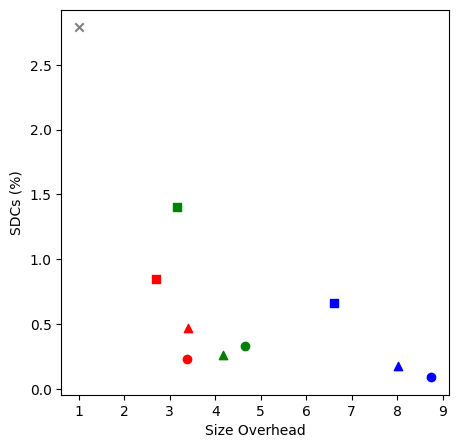

In [9]:
plt.figure(figsize=(5,5))
for name in data["Name"]:
    d = df[df["Name"] == name]
    if "sEDDI" in name:
        shape = "^"
    elif "EDDI" in name:
        shape = "o"
    elif "FDSC" in name: 
        shape = "s"
    else:
        shape = "x"
    
    if "inter-RASM" in name:
        color = "blue"
    elif "RASM" in name:
        color = "green"
    elif "CFCSS" in name:
        color = "red"
    else:
        color = "gray"
    plt.scatter(d["Size"], d["SDC"], c=color, marker=shape)
plt.xlabel("Size Overhead")
plt.ylabel("SDCs (%)")
plt.savefig("figures/tradeoff_size.pdf", format='pdf', bbox_inches = 'tight', dpi=300)


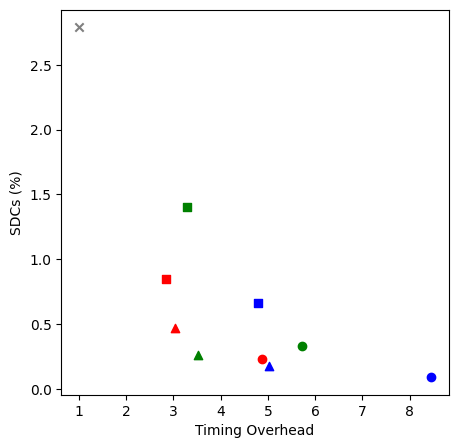

In [10]:
plt.figure(figsize=(5,5))
for name in data["Name"]:
    d = df[df["Name"] == name]
    if "sEDDI" in name:
        shape = "^"
    elif "EDDI" in name:
        shape = "o"
    elif "FDSC" in name: 
        shape = "s"
    else:
        shape = "x"
    
    if "inter-RASM" in name:
        color = "blue"
    elif "RASM" in name:
        color = "green"
    elif "CFCSS" in name:
        color = "red"
    else:
        color = "gray"
    plt.scatter(d["Slowdown"], d["SDC"], c=color, marker=shape)
plt.xlabel("Timing Overhead")
plt.ylabel("SDCs (%)")
plt.savefig("figures/tradeoff_time.pdf", format='pdf', bbox_inches = 'tight', dpi=300)